In [3]:
import pandas as pd

# Chargeons le fichier CSV dans un DataFrame
donnees_voitures_electriques = pd.read_csv('Données_Population_Véhicules_Électriques.csv')


In [4]:
donnees_voitures_electriques.columns

Index(['VIN (1-10)', 'Département', 'Ville', 'État', 'Code Postal',
       'Année Modèle', 'Constructeur', 'Modèle', 'Type de Véhicule Électrique',
       'Éligibilité CAFV', 'Autonomie Électrique', 'Prix de Vente Recommandé',
       'District Législatif', 'ID Véhicule DOL', 'Localisation du Véhicule',
       'Fournisseur d'Électricité', 'Tract de Recensement 2020'],
      dtype='object')

In [5]:
donnees_voitures_electriques.head(5)

,VIN (1-10),Département,Ville,État,Code Postal,Année Modèle,Constructeur,Modèle,Type de Véhicule Électrique,Éligibilité CAFV,Autonomie Électrique,Prix de Vente Recommandé,District Législatif,ID Véhicule DOL,Localisation du Véhicule,Fournisseur d'Électricité,Tract de Recensement 2020
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [6]:
## Résumons la structure et les types de données de ev_data.
donnees_voitures_electriques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147420 entries, 0 to 147419
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VIN (1-10)                   147420 non-null  object 
 1   Département                  147420 non-null  object 
 2   Ville                        147420 non-null  object 
 3   État                         147420 non-null  object 
 4   Code Postal                  147420 non-null  int64  
 5   Année Modèle                 147420 non-null  int64  
 6   Constructeur                 147420 non-null  object 
 7   Modèle                       147420 non-null  object 
 8   Type de Véhicule Électrique  147420 non-null  object 
 9   Éligibilité CAFV             147420 non-null  object 
 10  Autonomie Électrique         147420 non-null  int64  
 11  Prix de Vente Recommandé     147420 non-null  int64  
 12  District Législatif          147191 non-null  float64
 13 

In [7]:
#verifions le nombre de valeur manquante
donnees_voitures_electriques.isnull().sum()

VIN (1-10)                       0
Département                      0
Ville                            0
État                             0
Code Postal                      0
Année Modèle                     0
Constructeur                     0
Modèle                           0
Type de Véhicule Électrique      0
Éligibilité CAFV                 0
Autonomie Électrique             0
Prix de Vente Recommandé         0
District Législatif            229
ID Véhicule DOL                  0
Localisation du Véhicule         1
Fournisseur d'Électricité        0
Tract de Recensement 2020        1
dtype: int64

In [8]:
#supprimons toutes les lignes contenant des valeurs manquantes dans le DataFrame
donnees_voitures_electriques= donnees_voitures_electriques.dropna()

In [9]:
#revérifions
donnees_voitures_electriques.isnull().sum()

VIN (1-10)                     0
Département                    0
Ville                          0
État                           0
Code Postal                    0
Année Modèle                   0
Constructeur                   0
Modèle                         0
Type de Véhicule Électrique    0
Éligibilité CAFV               0
Autonomie Électrique           0
Prix de Vente Recommandé       0
District Législatif            0
ID Véhicule DOL                0
Localisation du Véhicule       0
Fournisseur d'Électricité      0
Tract de Recensement 2020      0
dtype: int64

##**Analysons la croissance de la population de véhicules électriques par année modèle.**

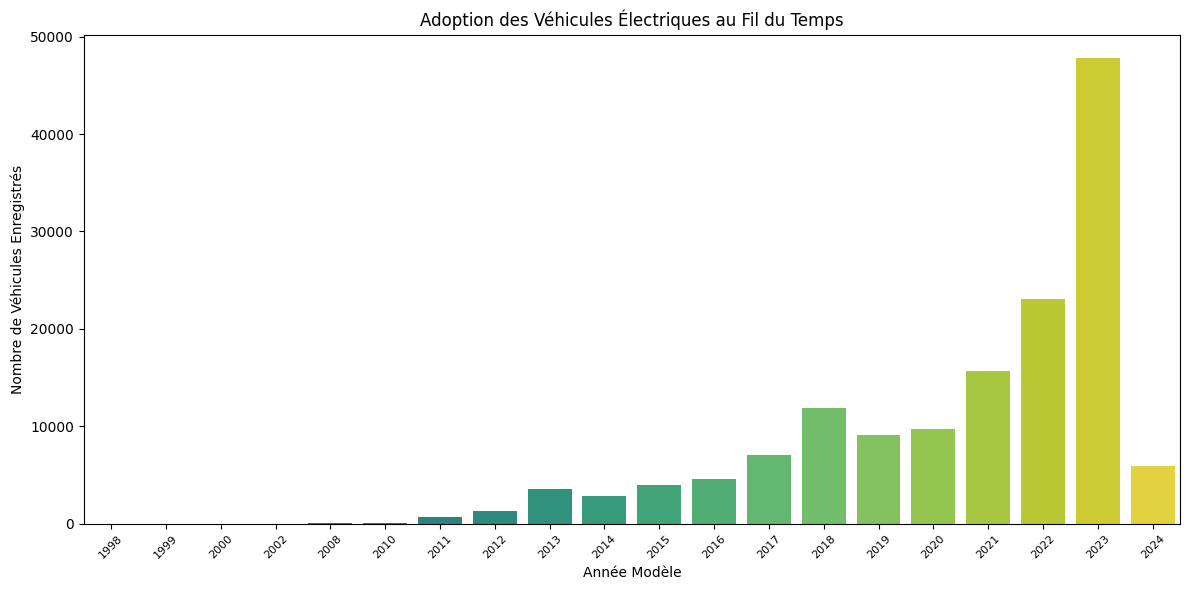

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adoption des Véhicules Électriques au Fil du Temps
plt.figure(figsize=(12, 6))
adoption_ve_par_an = donnees_voitures_electriques['Année Modèle'].value_counts().sort_index()
sns.barplot(x=adoption_ve_par_an.index, y=adoption_ve_par_an.values, hue=adoption_ve_par_an.index, palette="viridis", legend=False)
plt.title('Adoption des Véhicules Électriques au Fil du Temps')
plt.xlabel('Année Modèle')
plt.ylabel('Nombre de Véhicules Enregistrés')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()



D’après le graphique à barres ci-dessus, il est clair que l’adoption des véhicules électriques a augmenté au fil du temps, en particulier en notant une tendance à la hausse significative à partir de 2016. Le nombre de véhicules immatriculés augmente modestement jusqu’à ce moment-là, puis commence à augmenter plus rapidement à partir de 2017. L’année 2023 montre une augmentation particulièrement forte du nombre de véhicules électriques immatriculés, la barre de 2023 étant la plus élevée du graphique, indiquant un pic d’adoption des véhicules électriques.

##**Répartition géographique : Comprenons où les véhicules électriques sont le plus souvent immatriculés (par exemple, par département ou par ville).**

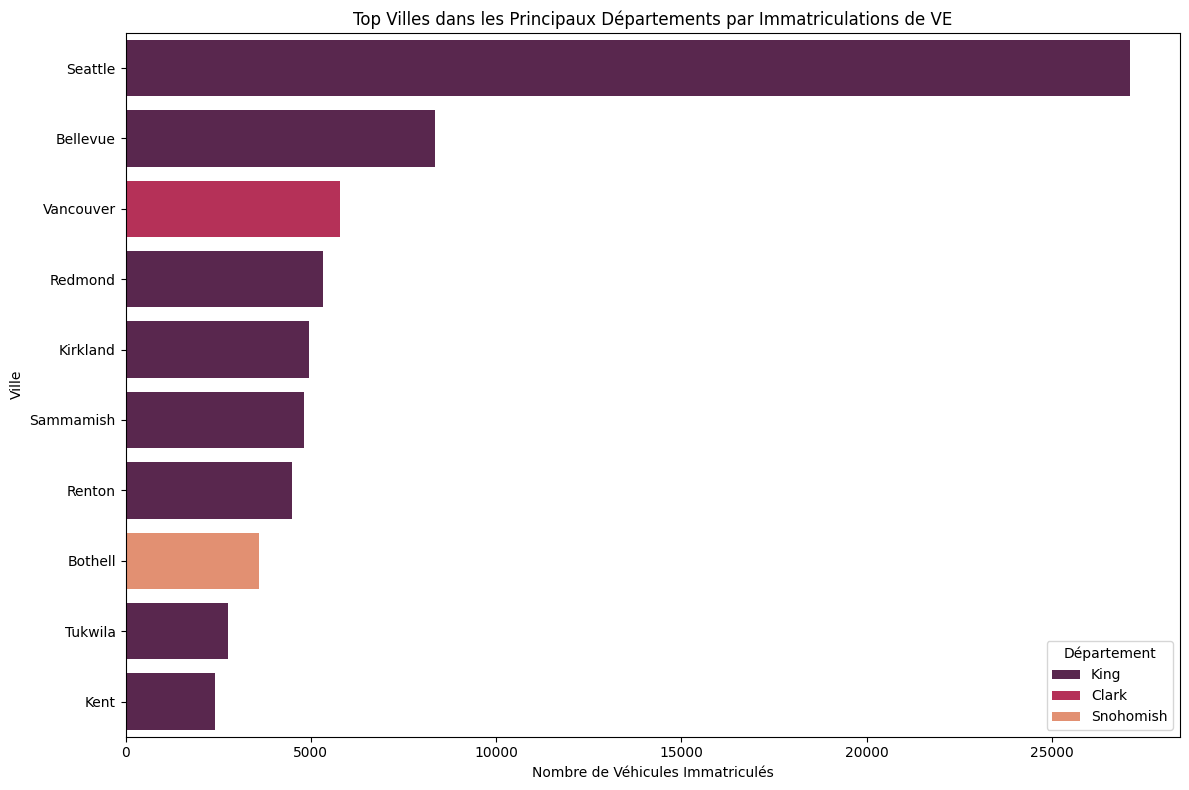

In [12]:
# Distribution des véhicules électriques par département
distribution_departement_ve = donnees_voitures_electriques['Département'].value_counts()
top_departements = distribution_departement_ve.head(3).index

# Filtrons le jeu de données pour ces départements principaux
donnees_departements_principaux = donnees_voitures_electriques[donnees_voitures_electriques['Département'].isin(top_departements)]

# Analysons la distribution des VE dans les villes de ces départements principaux
distribution_villes_departements_principaux = donnees_departements_principaux.groupby(['Département', 'Ville']).size().sort_values(ascending=False).reset_index(name='Nombre de Véhicules')

# Visualisons les 10 principales villes de ces départements
top_villes = distribution_villes_departements_principaux.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Nombre de Véhicules', y='Ville', hue='Département', data=top_villes, palette="rocket")
plt.title('Top Villes dans les Principaux Départements par Immatriculations de VE')
plt.xlabel('Nombre de Véhicules Immatriculés')
plt.ylabel('Ville')
plt.legend(title='Département')
plt.tight_layout()
plt.show()


Le graphique ci-dessus compare le nombre de véhicules électriques immatriculés dans diverses villes de trois département : King, Snohomish et Pierce. Les barres horizontales représentent les villes, et leur longueur correspond au nombre de véhicules immatriculés, codés par couleur par département. Voici les principales conclusions du graphique ci-dessus :

Seattle, qui se trouve dans le département de King, a le plus grand nombre d’immatriculations de véhicules électriques par une marge significative, dépassant de loin les autres villes répertoriées.
Bellevue et Redmond, également dans le département de King, suivent Seattle avec les autres immatriculations les plus élevées, bien que celles-ci soient considérablement inférieures à celles de Seattle.
Les villes du département de Snohomish, telles que Kirkland et Sammamish, affichent des immatriculations modérées de véhicules électriques.
Tacoma et Tukwila, représentant le département de Pierce, ont le moins d’immatriculations de véhicules électriques parmi les villes répertoriées, Tacoma devançant légèrement Tukwila.
La majorité des villes indiquées sont du département de King, qui semble dominer les immatriculations de véhicules électriques parmi les trois départements.
Dans l’ensemble, le graphique indique que l’adoption des véhicules électriques n’est pas uniforme dans les villes et est plus concentrée dans certaines régions, en particulier dans le département de King.

##**Types de véhicules électriques : Répartition du jeu de données par type de véhicule électrique**

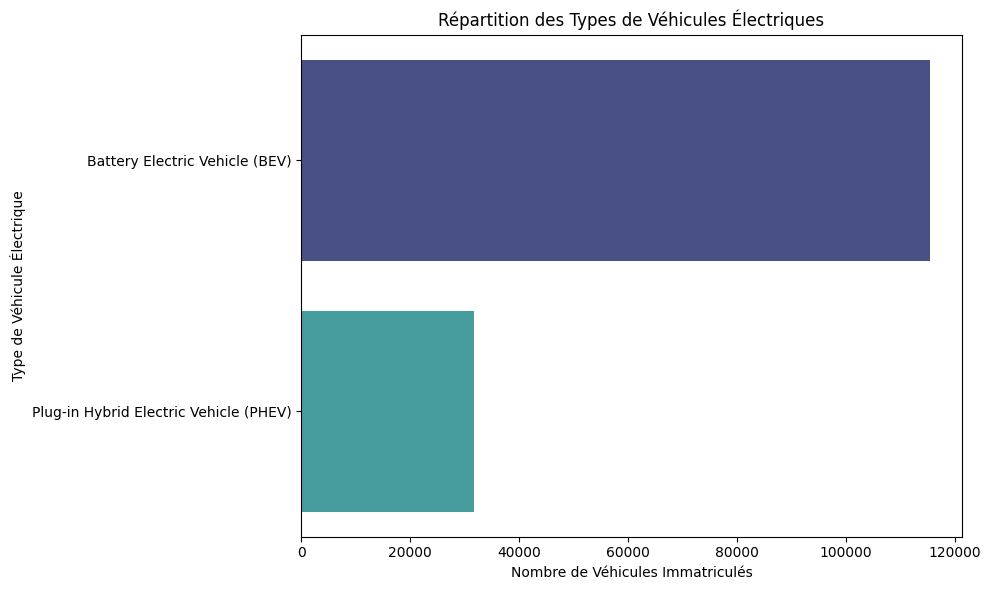

In [18]:
# Analysons la répartition des types de véhicules électriques
distribution_type_ve = donnees_voitures_electriques['Type de Véhicule Électrique'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=distribution_type_ve.values, y=distribution_type_ve.index, hue=distribution_type_ve.index, palette="mako", dodge=False)
plt.title('Répartition des Types de Véhicules Électriques')
plt.xlabel('Nombre de Véhicules Immatriculés')
plt.ylabel('Type de Véhicule Électrique')
plt.tight_layout()
plt.show()


Le graphique ci-dessus montre que parmi les véhicules électriques immatriculés aux États-Unis, les Véhicules Électriques à Batterie (BEV) sont plus populaires ou préférés que les Véhicules Électriques Hybrides Rechargeables (PHEV).

##**Popularité de la marque et du modèle : Identifions les marques et les modèles les plus populaires parmi les véhicules électriques enregistrés.**

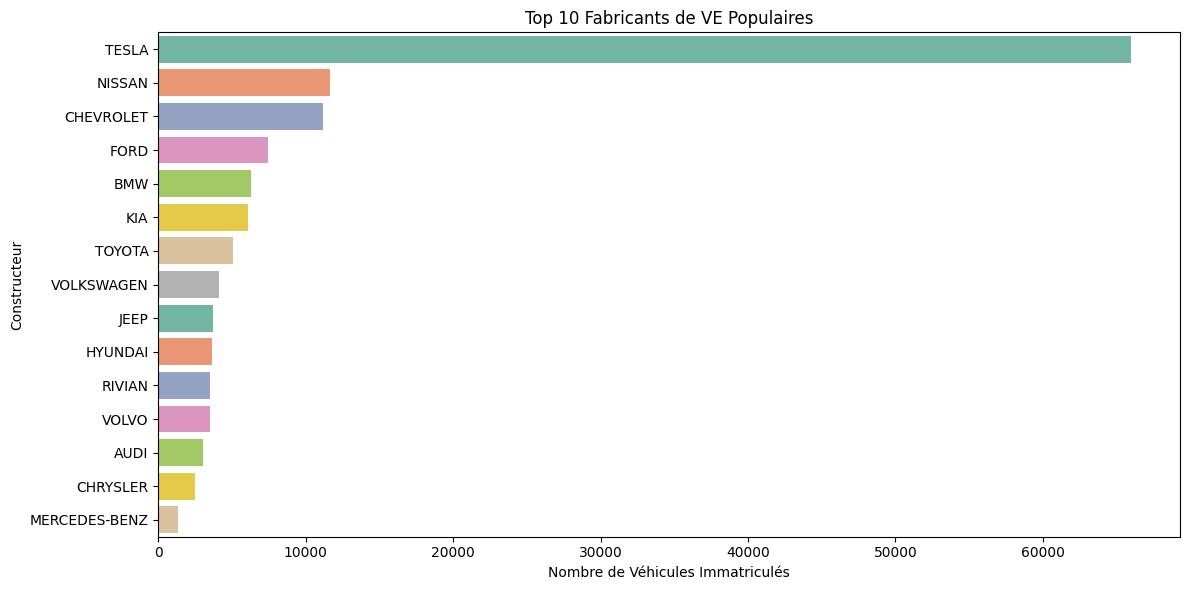

In [16]:
# Analyse de la popularité des fabricants de VE
distribution_constructeurs_ve = donnees_voitures_electriques['Constructeur'].value_counts().head(15)  # Limitation aux 15 premiers pour plus de clarté

plt.figure(figsize=(12, 6))
sns.barplot(x=distribution_constructeurs_ve.values, y=distribution_constructeurs_ve.index, hue=distribution_constructeurs_ve.index, palette="Set2", legend=False)
plt.title('Top 10 Fabricants de VE Populaires')
plt.xlabel('Nombre de Véhicules Immatriculés')
plt.ylabel('Constructeur')
plt.tight_layout()
plt.show()


Le graphique ci-dessus montre que :

TESLA est en tête avec une marge substantielle avec le plus grand nombre de véhicules immatriculés. NISSAN est le deuxième constructeur le plus populaire, suivi de CHEVROLET, bien que les deux aient beaucoup moins d’immatriculations que TESLA. FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP et HYUNDAI suivent par ordre décroissant du nombre de véhicules immatriculés.

##**Analysons l’autonomie électrique des véhicules pour voir comment la technologie des véhicules électriques progresse.**

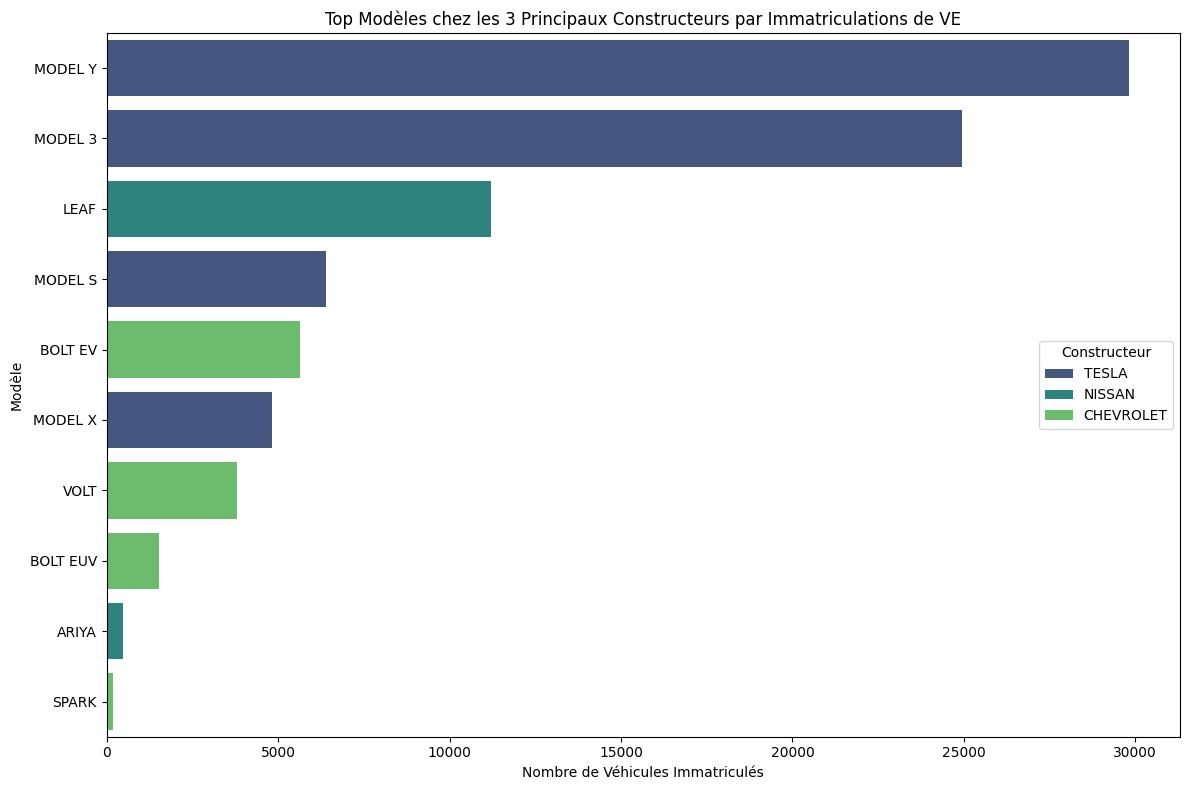

In [19]:
# Sélection des 3 principaux fabricants en fonction du nombre de véhicules immatriculés
top_3_constructeurs = distribution_constructeurs_ve.head(3).index

# Filtrons le jeu de données pour ces principaux fabricants
donnees_principaux_constructeurs = donnees_voitures_electriques[donnees_voitures_electriques['Constructeur'].isin(top_3_constructeurs)]

# Analysons la popularité des modèles de VE au sein de ces principaux fabricants
distribution_modeles_ve_principaux_constructeurs = donnees_principaux_constructeurs.groupby(['Constructeur', 'Modèle']).size().sort_values(ascending=False).reset_index(name='Nombre de Véhicules')

# Visualisons les 10 principaux modèles parmi ces fabricants pour plus de clarté
top_modeles = distribution_modeles_ve_principaux_constructeurs.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Nombre de Véhicules', y='Modèle', hue='Constructeur', data=top_modeles, palette="viridis")
plt.title('Top Modèles chez les 3 Principaux Constructeurs par Immatriculations de VE')
plt.xlabel('Nombre de Véhicules Immatriculés')
plt.ylabel('Modèle')
plt.legend(title='Constructeur', loc='center right')
plt.tight_layout()
plt.show()


Le graphique ci-dessus montre la répartition des immatriculations de véhicules électriques parmi différents modèles des trois principaux constructeurs : TESLA, NISSAN et CHEVROLET. Voici les conclusions :

- Les modèles MODEL Y et MODEL 3 de TESLA sont les véhicules les plus immatriculés, avec le MODEL Y ayant le nombre le plus élevé d'immatriculations.
- La LEAF de NISSAN est le troisième modèle le plus immatriculé et le modèle non-TESLA le plus immatriculé.
- Les modèles MODEL S et MODEL X de TESLA ont également un nombre significatif d'immatriculations.
- Le BOLT EV et le VOLT de CHEVROLET occupent ensuite une place importante dans le classement avec des immatriculations considérables, suivis du BOLT EUV.
- L'ARIYA de NISSAN et le SPARK de CHEVROLET ont le moins d'immatriculations parmi les modèles présentés.
Ensuite, nous allons explorer l'autonomie des véhicules électriques, qui est un facteur critique pour analyser la taille du marché des véhicules électriques. L'autonomie électrique indique la distance qu'un VE peut parcourir avec une seule charge, et les progrès dans la technologie des batteries ont régulièrement augmenté ces distances au fil des ans. Ainsi, examinons la répartition des autonomies électriques dans le jeu de données et identifions les tendances remarquables, telles que les améliorations au fil du temps ou les variations entre les différents types de véhicules ou fabricants :

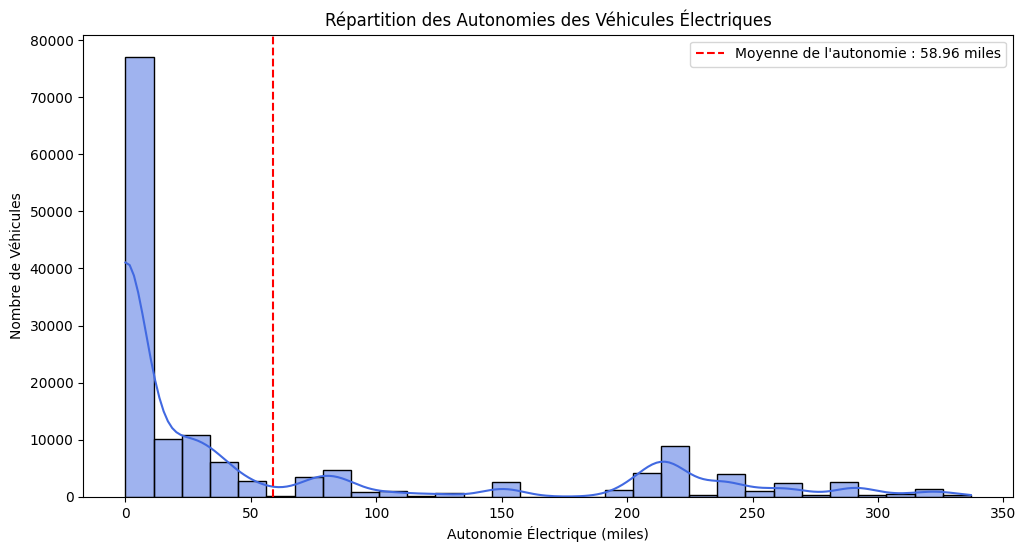

In [20]:
# Analysons la répartition de l'autonomie électrique
plt.figure(figsize=(12, 6))
sns.histplot(donnees_voitures_electriques['Autonomie Électrique'], bins=30, kde=True, color='royalblue')
plt.title('Répartition des Autonomies des Véhicules Électriques')
plt.xlabel('Autonomie Électrique (miles)')
plt.ylabel('Nombre de Véhicules')
plt.axvline(donnees_voitures_electriques['Autonomie Électrique'].mean(), color='red', linestyle='--', label=f'Moyenne de l\'autonomie : {donnees_voitures_electriques["Autonomie Électrique"].mean():.2f} miles')
plt.legend()
plt.show()


Le graphique ci-dessus montre la moyenne de l'autonomie électrique. Les observations clés du graphique comprennent :

- Il y a une fréquence élevée de véhicules avec une faible autonomie électrique, avec un pic significatif juste avant 50 miles.
- La distribution est asymétrique vers la droite, avec une longue queue s'étendant vers des plages plus élevées, bien que le nombre de véhicules avec des plages plus élevées soit beaucoup moins fréquent.
- L'autonomie électrique moyenne pour cet ensemble de véhicules est marquée à environ 58,84 miles, ce qui est relativement faible par rapport aux plages les plus élevées affichées sur le graphique.
- Malgré la présence de véhicules électriques avec des plages s'étendant jusqu'à environ 350 miles, la majorité des véhicules ont une plage inférieure à la moyenne.
Cela suggère qu'alors qu'il existe des VE disponibles avec des plages électriques élevées, la plage moyenne est orientée vers le bas en raison d'un nombre substantiel de véhicules avec des plages plus courtes.

Maintenant, plongeons dans la tendance des autonomies électriques au fil des années-modèles, ce qui peut fournir des insights sur la manière dont les progrès de la technologie des batteries et de la conception des véhicules ont influencé les capacités d'autonomie électrique des véhicules électriques au fil du temps. Une tendance positive dans cette analyse indiquerait des améliorations continues, offrant aux consommateurs des VE avec des autonomies de conduite plus longues et potentiellement en abordant l'une des principales préoccupations concernant le marché des VE (l'anxiété liée à l'autonomie) :

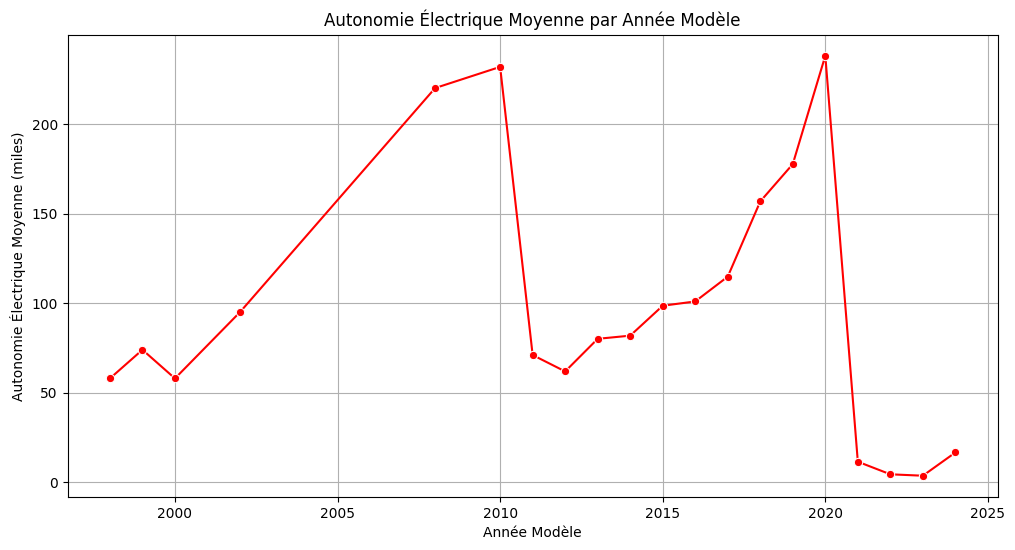

In [22]:
# Calculons l'autonomie électrique moyenne par année-modèle
autonomie_moyenne_par_annee = donnees_voitures_electriques.groupby('Année Modèle')['Autonomie Électrique'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Année Modèle', y='Autonomie Électrique', data=autonomie_moyenne_par_annee, marker='o', color='red')
plt.title('Autonomie Électrique Moyenne par Année Modèle')
plt.xlabel('Année Modèle')
plt.ylabel('Autonomie Électrique Moyenne (miles)')
plt.grid(True)
plt.show()


Le graphique ci-dessus montre l'évolution de l'autonomie électrique moyenne des véhicules à partir de l'année 2000 jusqu'en 2024. Les principales conclusions du graphique sont les suivantes :

- On observe une tendance générale à la hausse de l'autonomie électrique moyenne des VE au fil des ans, ce qui indique des améliorations dans la technologie et l'efficacité des batteries.
- On remarque un pic notable autour de l'année 2020, lorsque l'autonomie moyenne atteint son point le plus élevé.
- Après 2020, on observe une baisse significative de l'autonomie moyenne, ce qui pourrait indiquer que les données pour les années suivantes pourraient être incomplètes ou refléter l'introduction de plusieurs modèles avec une autonomie plus faible.
- Après la forte baisse, on observe une légère reprise de l'autonomie moyenne dans l'année la plus récente présentée sur le graphique.
Les données suggèrent qu'il y a eu des fluctuations, mais que la tendance générale au cours des deux dernières décennies a été à l'augmentation de l'autonomie électrique des VE.

Ensuite, explorons comment les autonomies électriques varient parmi les principaux fabricants et modèles. Cette analyse peut révéler comment différents fabricants abordent l'aspect crucial de l'autonomie électrique et mettre en évidence les modèles qui se distinguent par leurs capacités d'autonomie supérieures :

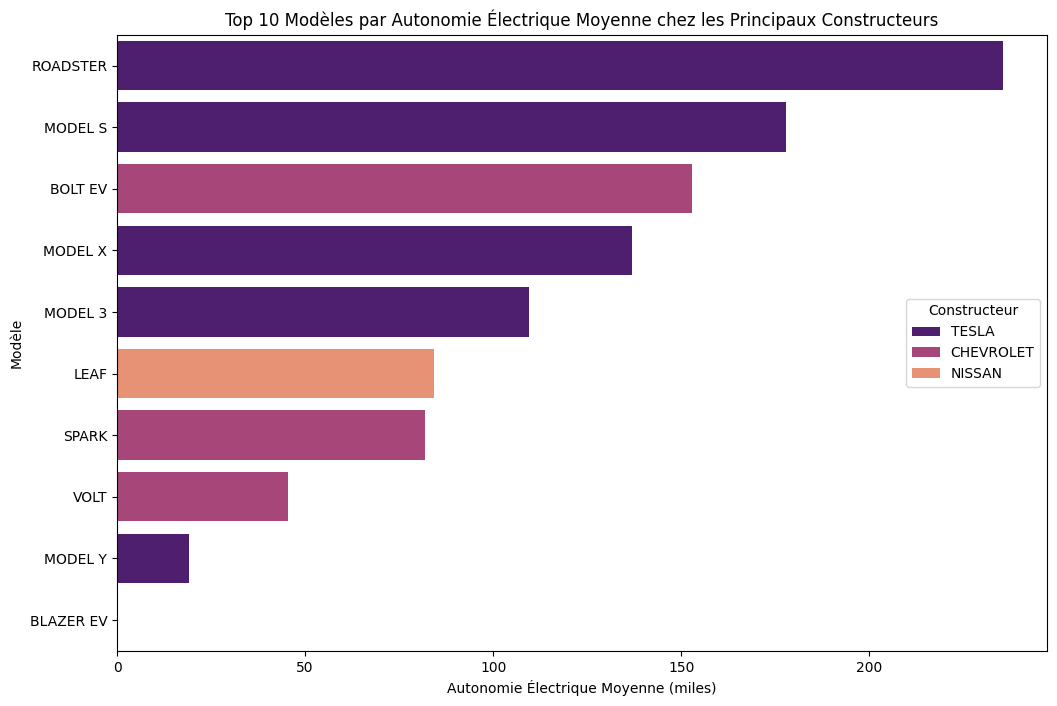

In [24]:
# Calculons de l'autonomie électrique moyenne par modèle
autonomie_moyenne_par_modele = donnees_principaux_constructeurs.groupby(['Constructeur', 'Modèle'])['Autonomie Électrique'].mean().sort_values(ascending=False).reset_index()

# Les 10 modèles avec la plus grande moyenne d'autonomie électrique
top_modeles_autonomie = autonomie_moyenne_par_modele.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Autonomie Électrique', y='Modèle', hue='Constructeur', data=top_modeles_autonomie, palette="magma")
plt.title('Top 10 Modèles par Autonomie Électrique Moyenne chez les Principaux Constructeurs')
plt.xlabel('Autonomie Électrique Moyenne (miles)')
plt.ylabel('Modèle')
plt.legend(title='Constructeur', loc='center right')
plt.show()


Le TESLA ROADSTER a la plus grande autonomie électrique moyenne parmi les modèles répertoriés. Les modèles de TESLA (ROADSTER, MODEL S, MODEL X et MODEL 3) occupent la majorité des premières positions, ce qui indique qu'en moyenne, les véhicules de TESLA ont des autonomies électriques plus élevées. Le CHEVROLET BOLT EV est une exception parmi les modèles CHEVROLET, ayant une autonomie considérablement plus élevée que la VOLT et la S-10 PICKUP du même fabricant. La LEAF de NISSAN et la SPARK de CHEVROLET se trouvent dans la moitié inférieure du graphique, suggérant des autonomies moyennes plus modestes.

##**Analysons  la taille estimée du marché des véhicules électriques aux États-Unis**

In [25]:
# Calculons le nombre de VE immatriculés chaque année
nombre_immatriculations_ve = donnees_voitures_electriques['Année Modèle'].value_counts().sort_index()
nombre_immatriculations_ve

Année Modèle
1998        1
1999        2
2000        7
2002        2
2008       16
2010       22
2011      648
2012     1309
2013     3594
2014     2836
2015     4013
2016     4585
2017     6999
2018    11884
2019     9146
2020     9707
2021    15682
2022    23066
2023    47794
2024     5876
Name: count, dtype: int64

Le jeu de données fournit le nombre de véhicules électriques immatriculés chaque année de 1997 à 2024. Cependant, les données pour 2024 sont incomplètes car elles ne contiennent que les données jusqu'en mars. Voici un résumé des immatriculations de VE pour les années récentes :

En 2021, il y avait 19 063 VE immatriculés.
En 2022, le nombre est passé à 27 708 VE.
En 2023, on a observé un saut significatif à 57 519 VE.
Pour 2024, actuellement, 7 072 VE sont immatriculés, ce qui suggère des données partielles.
Pour prévoir le nombre total de VE attendus à être immatriculés en 2024, nous pouvons utiliser une approche basée sur le taux de croissance des années précédentes complètes.

Nous allons calculer le Taux de Croissance Annuel Composé (TCAC) entre une année récente avec des données complètes (2023) et une année antérieure pour projeter les chiffres de 2024. De plus, en utilisant ce taux de croissance, nous pouvons estimer la taille du marché pour les cinq prochaines années. Poursuivons avec ces calculs :

In [26]:
from scipy.optimize import curve_fit
import numpy as np

# Filtrons le jeu de données pour inclure les années avec des données complètes, en supposant que 2023 est la dernière année complète
annees_filtrees = nombre_immatriculations_ve[nombre_immatriculations_ve.index <= 2023]

# Définissons une fonction de croissance exponentielle pour ajuster les données
def croissance_exp(x, a, b):
    return a * np.exp(b * x)

# Préparons les données pour l'ajustement de courbe
x_donnees = annees_filtrees.index - annees_filtrees.index.min()
y_donnees = annees_filtrees.values

# Ajustons les données à la fonction de croissance exponentielle
parametres, covariance = curve_fit(croissance_exp, x_donnees, y_donnees)

# Utilisons la fonction ajustée pour prévoir le nombre de VE pour 2024 et les cinq prochaines années
annees_previsionnelles = np.arange(2024, 2024 + 6) - annees_filtrees.index.min()
valeurs_previsionnelles = croissance_exp(annees_previsionnelles, *parametres)

# Créons un dictionnaire pour afficher les valeurs prévues pour une interprétation plus facile
ve_previsionnels = dict(zip(annees_previsionnelles + annees_filtrees.index.min(), valeurs_previsionnelles))

print(ve_previsionnels)


{2024: 65848.36802629216, 2025: 99787.41159048071, 2026: 151219.04779708636, 2027: 229159.17000134834, 2028: 347270.57180106564, 2029: 526258.0155021924}


Maintenant, nous allons tracer les données de la taille estimée du marché :

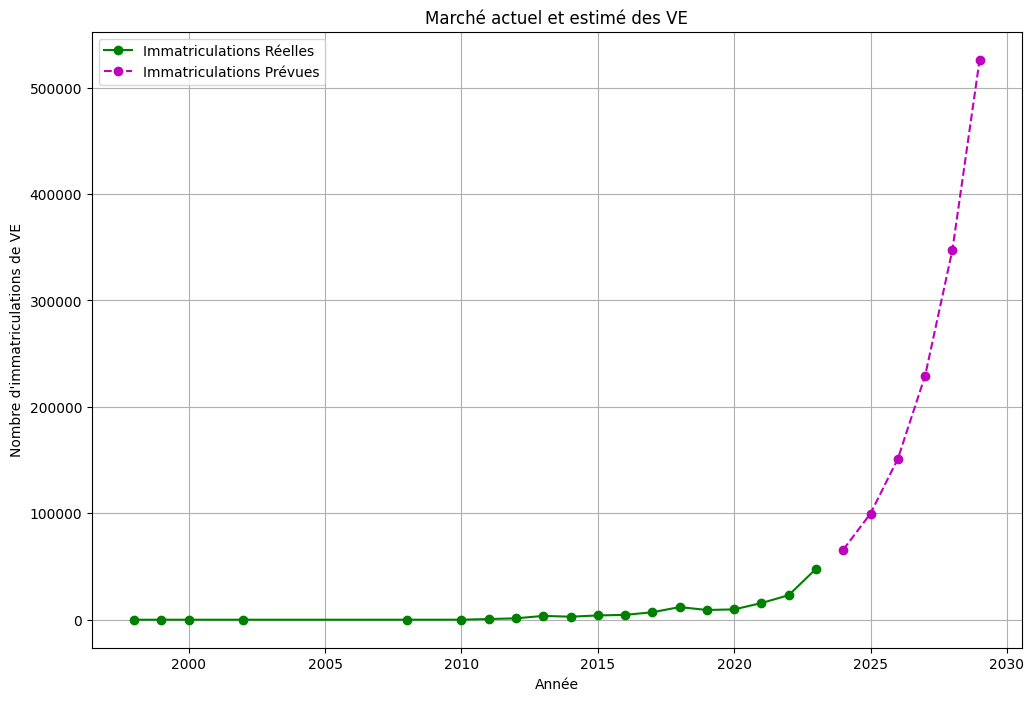

In [28]:
# Préparons les données pour le tracé
annees = np.arange(annees_filtrees.index.min(), 2029 + 1)
annees_reelles = annees_filtrees.index
annees_previsionnelles_complet = np.arange(2024, 2029 + 1)

# Valeurs réelles et prévues
valeurs_reelles = annees_filtrees.values
valeurs_previsionnelles_complet = [ve_previsionnels[annee] for annee in annees_previsionnelles_complet]

plt.figure(figsize=(12, 8))
plt.plot(annees_reelles, valeurs_reelles, 'go-', label='Immatriculations Réelles')
plt.plot(annees_previsionnelles_complet, valeurs_previsionnelles_complet, 'mo--', label='Immatriculations Prévues')

plt.title('Marché actuel et estimé des VE')
plt.xlabel('Année')
plt.ylabel('Nombre d\'immatriculations de VE')
plt.legend()
plt.grid(True)

plt.show()


À partir du graphique ci-dessus, nous pouvons observer :

Le nombre d'immatriculations réelles de VE est resté relativement bas et stable jusqu'aux environs de 2010, après quoi il y a eu une tendance à la hausse constante et prononcée, suggérant une augmentation significative de l'adoption des VE.
Les immatriculations prévues de VE prévoient une augmentation encore plus spectaculaire dans un avenir proche, avec un nombre d'immatriculations attendu en forte hausse dans les années à venir.
Étant donné la tendance croissante des immatriculations réelles de VE et l'accélération prévue selon les données de prévision, nous pouvons conclure que la taille du marché des VE devrait considérablement augmenter. L'augmentation importante des immatriculations prévues suggère que l'adoption des VE par les consommateurs est en hausse, et cette tendance devrait se poursuivre. Dans l'ensemble, les données indiquent un avenir prometteur pour l'industrie des VE, ce qui laisse présager un changement significatif dans les préférences des consommateurs et une augmentation potentielle des investissements et des opportunités commerciales connexes.

##**Résumé**


L'analyse de la taille du marché est un aspect crucial de la recherche de marché qui détermine le volume potentiel des ventes dans un marché donné. Elle aide les entreprises à comprendre l'ampleur de la demande, à évaluer les niveaux de saturation du marché et à identifier les opportunités de croissance. À partir de notre analyse de la taille du marché des véhicules électriques, nous avons trouvé un avenir prometteur pour l'industrie des VE, indiquant un changement significatif dans les préférences des consommateurs et une augmentation potentielle des investissements et des opportunités commerciales connexes.